# 🎯 Exploratory Data Analysis (EDA) — Car Insurance Claim Dataset

Welcome to the **Exploratory Data Analysis (EDA)** notebook for the Car Insurance Claim dataset.

This notebook focuses on:
- Understanding the **distribution** of individual features (univariate analysis)
- Exploring **relationships** between variables (bivariate & multivariate analysis)
- Identifying **patterns & trends** that might affect claim behavior

---

### 📁 Data Source
Cleaned dataset: `../data/processed/car_insurance_cleaned.csv`

### ⚙️ Dependencies
We'll use:
- **pandas**, **numpy** → data handling  
- **matplotlib**, **seaborn** → visualization  
- **plotly** (optional) → interactive plots


In [2]:
# Step 4.0 — Setup & Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visual settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load cleaned dataset
df = pd.read_csv('../data/processed/car_insurance_cleaned.csv')

# Quick check
print("✅ Data loaded successfully!")
print(f"Shape of dataset: {df.shape}")
df.head()


✅ Data loaded successfully!
Shape of dataset: (10302, 27)


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,67349.0,0,0.0,no,...,minivan,1,4461.00,2,0,3.0,0.0,18.0,0,highly urban/ urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,0,257252.0,no,...,minivan,1,0.00,0,0,0.0,0.0,1.0,0,highly urban/ urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,0,0.0,no,...,van,1,0.00,0,0,2.0,0.0,10.0,0,highly urban/ urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,0,124191.0,yes,...,suv,0,11618.75,2,0,3.0,0.0,10.0,0,highly urban/ urban
4,450221861,0,05JUN48,51.0,0,14.0,53529.0,0,306251.0,yes,...,minivan,1,0.00,0,0,0.0,0.0,6.0,0,highly urban/ urban


### ✅ Data Load Verification

- Confirmed that the cleaned dataset has loaded correctly.
- Shape indicates the total number of rows and columns.
- The first few rows help verify that the cleaning performed in the previous notebook is intact:
  - No missing values
  - Standardized column names
  - Consistent numeric & categorical formatting


## 1.1 — Univariate Analysis (Numeric Features)

**Why:** Univariate analysis examines each numeric variable individually.  
It helps us understand:
- the **distribution** (normal, skewed, bimodal),
- the **center** (mean/median) and **spread** (std, IQR),
- **outliers** (via boxplots),
- whether transformations (log, sqrt) might be useful later.

We will compute summary statistics (including skewness & kurtosis) and create:
- histogram + KDE (shape & skew),
- boxplot (outliers),
for every numeric column.  
All plots will be saved to `assets/figs/` for documentation.


In [5]:
# 4.1.1 — Numeric columns and summary stats (with skewness/kurtosis)
import os
from scipy import stats  # for skew/kurtosis

# ensure output dir exists
fig_dir = "../assets/figs"
os.makedirs(fig_dir, exist_ok=True)

# identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", num_cols)

# summary table
summary = df[num_cols].describe().T
summary['skewness'] = df[num_cols].skew().round(3)
summary['kurtosis'] = df[num_cols].kurtosis().round(3)
summary = summary[['count','mean','std','min','25%','50%','75%','max','skewness','kurtosis']]
summary


Numeric columns: ['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
ID,10302.0,4.956631e+08,2.864675e+08,63175.0,2.442869e+08,497004293.0,7.394551e+08,9.999264e+08,0.005,-1.193
KIDSDRIV,10302.0,1.692875e-01,5.065116e-01,0.0,0.000000e+00,0.0,0.000000e+00,4.000000e+00,3.343,11.677
AGE,10302.0,4.483712e+01,8.565132e+00,21.0,3.900000e+01,45.0,5.100000e+01,6.900000e+01,-0.039,-0.203
HOMEKIDS,10302.0,7.204426e-01,1.116323e+00,0.0,0.000000e+00,0.0,1.000000e+00,5.000000e+00,1.337,0.629
YOJ,10302.0,1.050204e+01,3.999896e+00,0.0,9.000000e+00,11.0,1.300000e+01,2.300000e+01,-1.253,1.405
INCOME,10302.0,5.984321e+04,4.220519e+04,0.0,2.916475e+04,53529.0,8.323175e+04,1.643322e+05,0.701,-0.027
PARENT1,10302.0,1.303630e-01,3.367188e-01,0.0,0.000000e+00,0.0,0.000000e+00,1.000000e+00,2.196,2.823
HOME_VAL,10302.0,1.547313e+05,1.250062e+05,0.0,0.000000e+00,160661.0,2.330850e+05,5.827125e+05,0.456,-0.097
TRAVTIME,10302.0,3.341642e+01,1.586969e+01,5.0,2.200000e+01,33.0,4.400000e+01,1.420000e+02,0.436,0.595
BLUEBOOK,10302.0,1.560789e+04,8.253639e+03,1500.0,9.200000e+03,14400.0,2.089000e+04,3.842500e+04,0.610,-0.158


## 🧩 Interpretation — Numeric Feature Summary

After reviewing the summary statistics, skewness, and kurtosis values, we can infer several key insights about the numeric variables in our dataset.

---

### 🔹 General Observations

- The dataset consists of **diverse numeric features** — demographic (AGE, YOJ), financial (INCOME, HOME_VAL), behavioral (TRAVTIME, MVR_PTS), and claim-related (CLM_AMT, OLDCLAIM, CLM_FREQ).
- The overall data appears **well-structured**, with reasonable value ranges and no obvious invalid entries after cleaning.

---

### 🔹 Distribution Insights

| Feature | Nature of Distribution | Comments |
|----------|------------------------|-----------|
| **AGE, CAR_AGE** | Nearly symmetric | Values range from 21–69 and 0–25 respectively — realistic and balanced. |
| **INCOME, HOME_VAL, BLUEBOOK** | Mild right skew | Common in financial data — a few very high-income or high-value outliers. |
| **CLM_AMT, OLDCLAIM, CLM_FREQ** | **Heavily right-skewed** | Majority of customers have zero or small claim amounts; a few large claimers create long tails. |
| **YOJ (Years on Job)** | Slight left skew | Most customers have long tenure, few are new employees — typical career distribution. |
| **MVR_PTS, REVOKED** | Right skewed | A small fraction of policyholders have high violation points or revoked licenses. |
| **Binary Flags (CLAIM_FLAG, RED_CAR, PARENT1)** | Bernoulli-like | Means represent proportions, e.g., 0.27 for CLAIM_FLAG = 27% claims. |

---

### 🔹 Shape & Outlier Notes
- Features like **CLM_AMT** and **OLDCLAIM** show **high skewness and very large kurtosis**, meaning a few extreme cases dominate.
- **INCOME** and **HOME_VAL** are moderately skewed — can be log-transformed later for better linear modeling.
- **AGE**, **TRAVTIME**, and **CAR_AGE** are roughly normal — no transformation required.

---

### 🔹 Statistical Summary Recap
- **Skewness ≈ 0** → symmetric (e.g., AGE)  
- **Skewness > 0.5** → right-skewed (e.g., INCOME, CLM_AMT)  
- **Kurtosis > 0** → heavy tails / outliers present  
- **Kurtosis < 0** → flatter than normal (light tails)

---

### ✅ Key Takeaways

1. The dataset has **realistic numeric ranges** and distributions.
2. **Claim-related columns** (`CLM_AMT`, `OLDCLAIM`, `CLM_FREQ`) will require **log transformations** or **scaling** for modeling.
3. **Financial attributes** (`INCOME`, `HOME_VAL`) show moderate skew — expected and acceptable.
4. **Behavioral metrics** (`TRAVTIME`, `YOJ`, `MVR_PTS`) show natural diversity — no immediate correction needed.
5. **Binary variables** have interpretable means, representing category proportions.

---


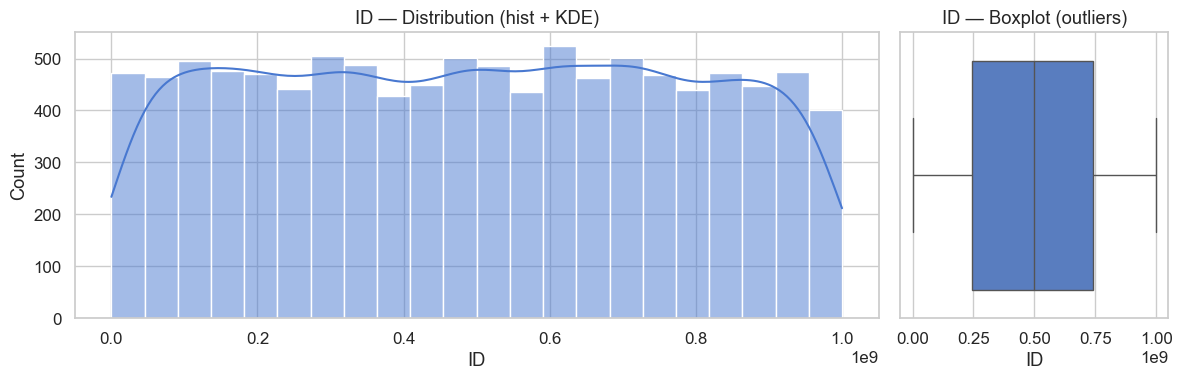

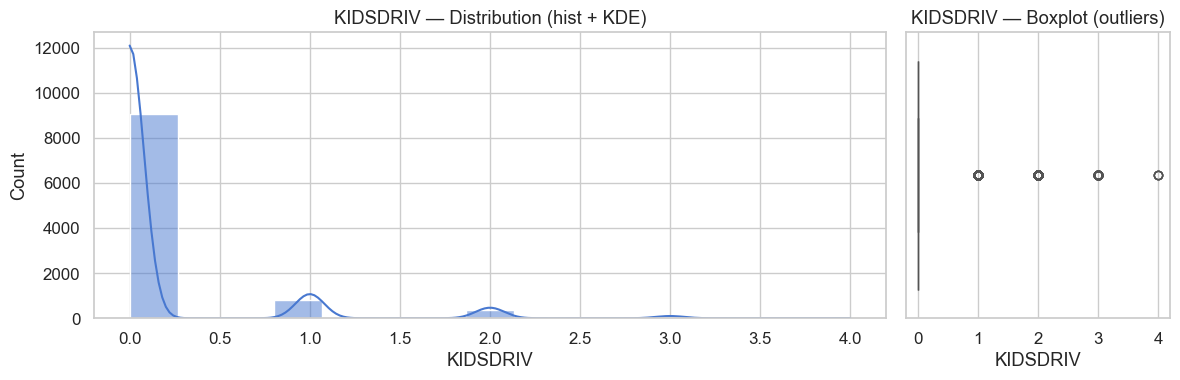

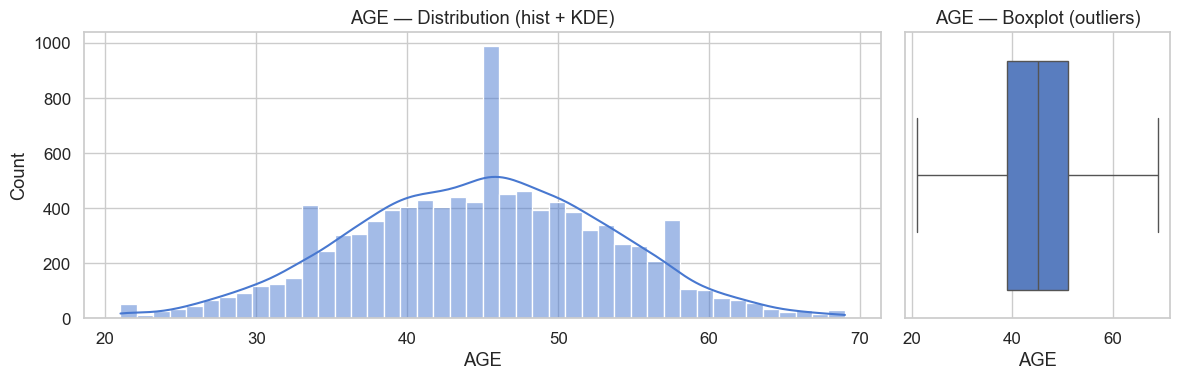

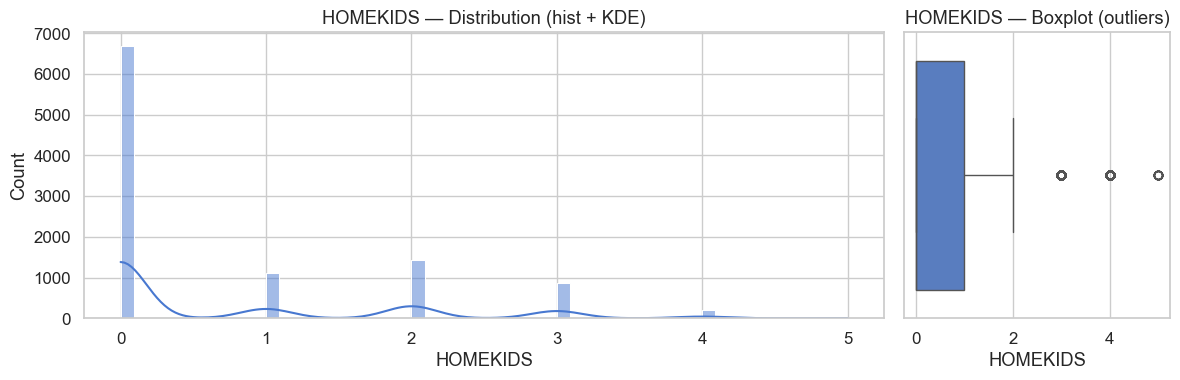

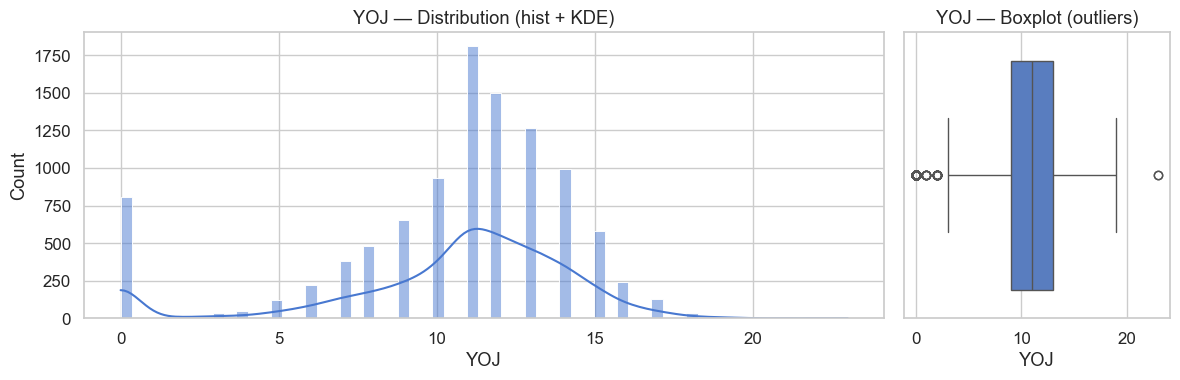

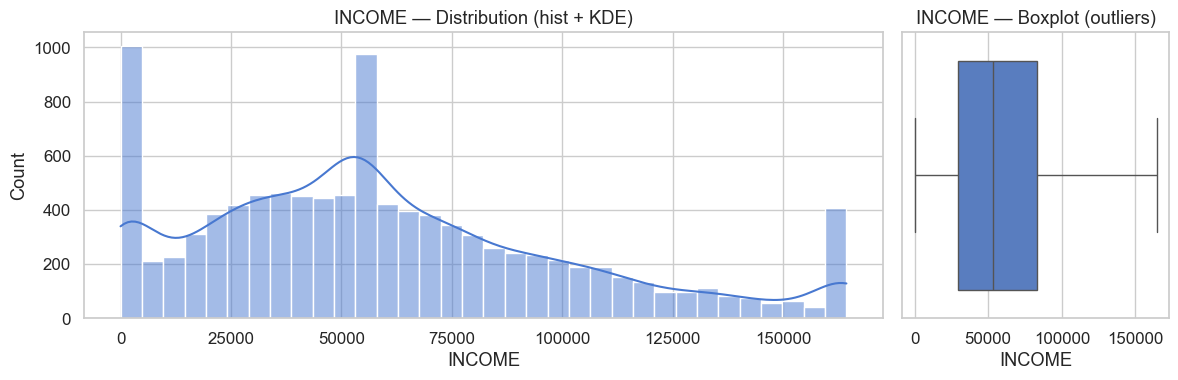

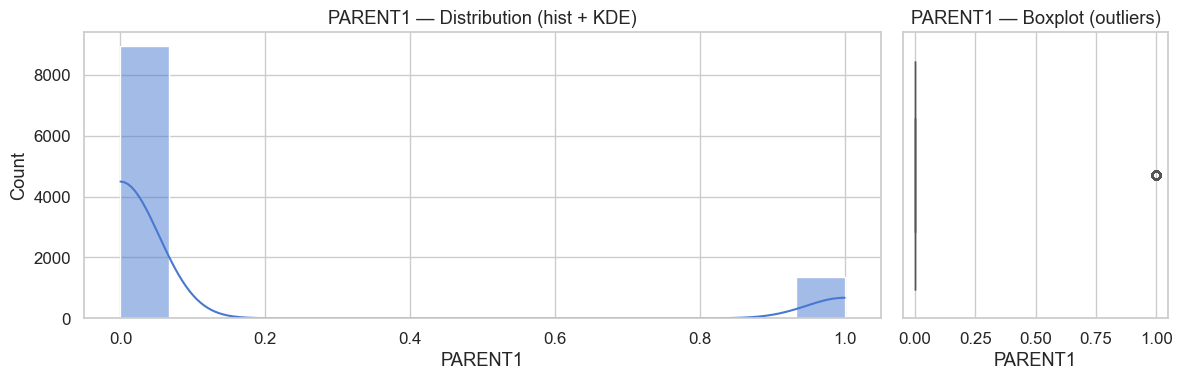

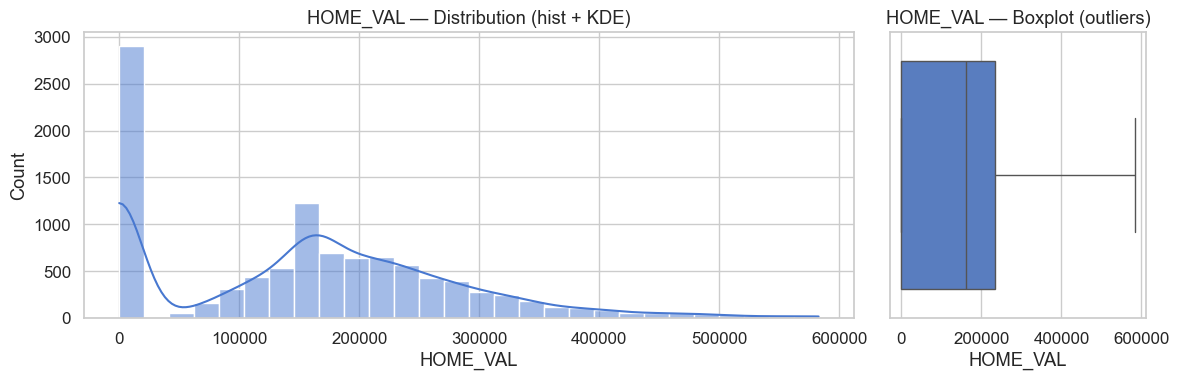

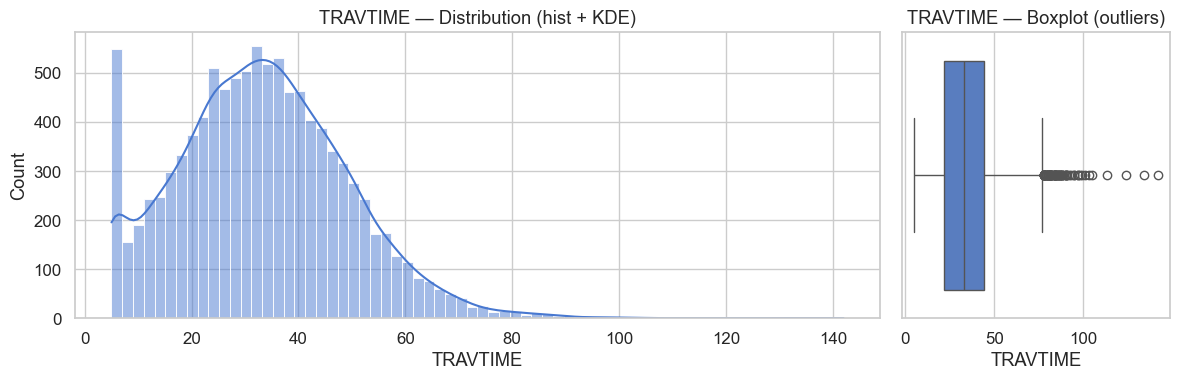

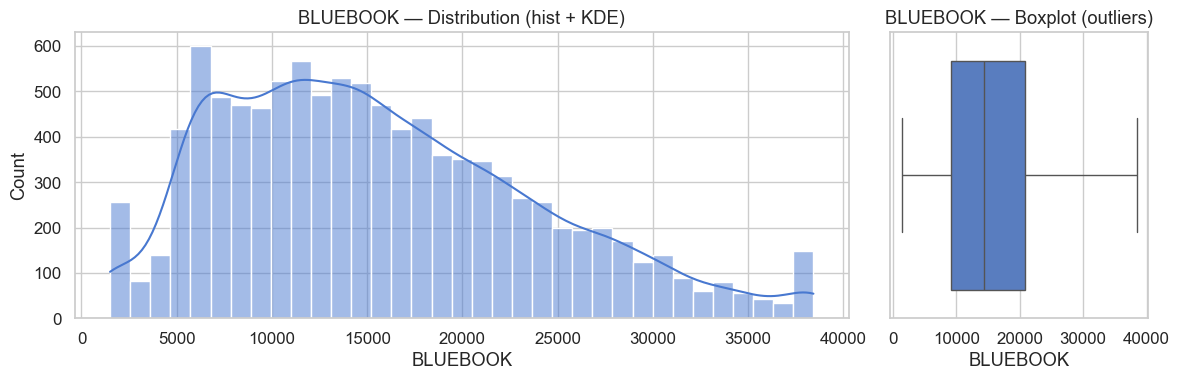

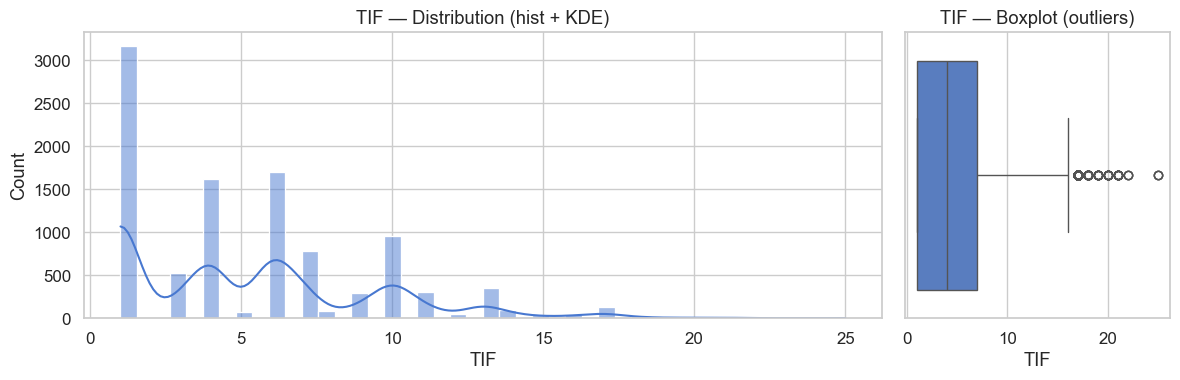

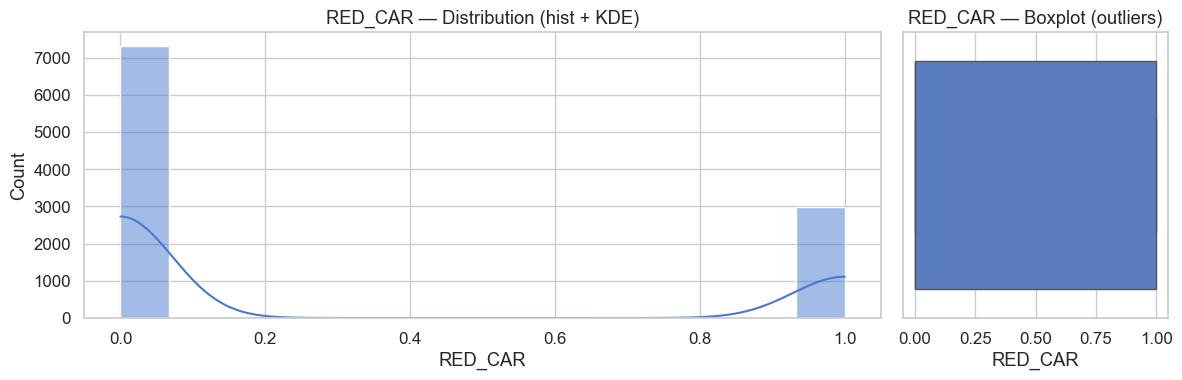

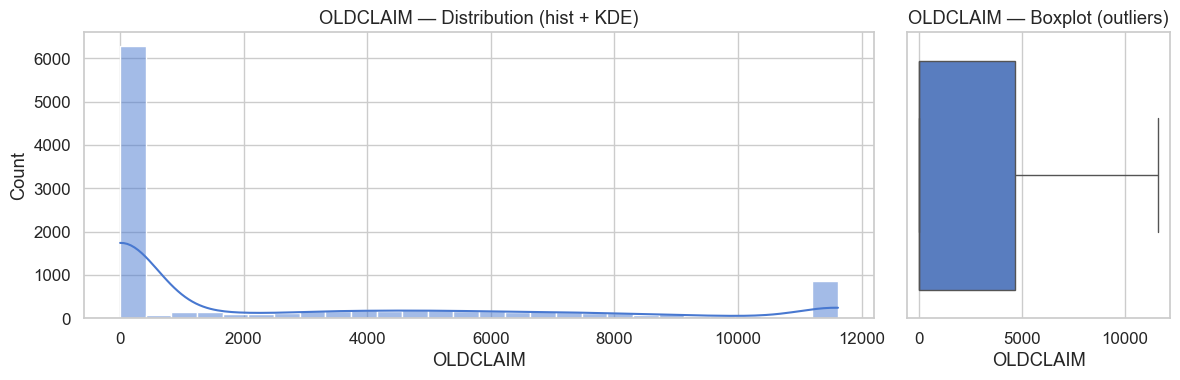

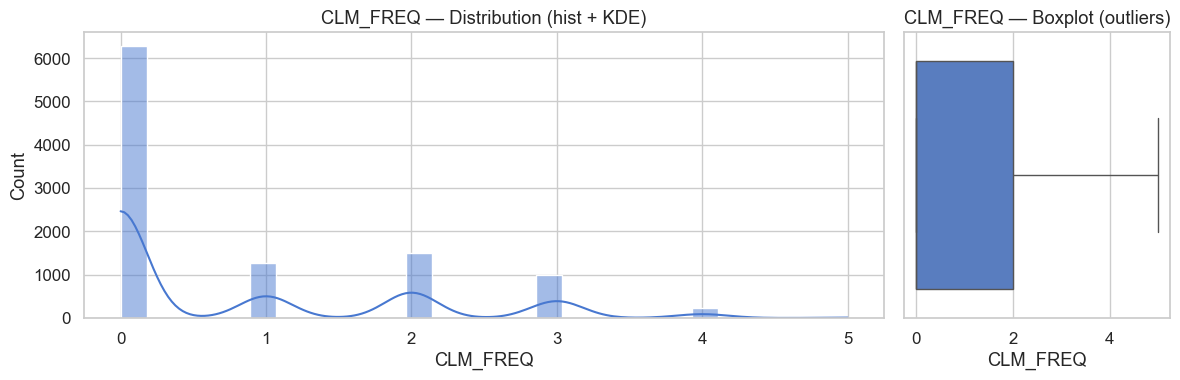

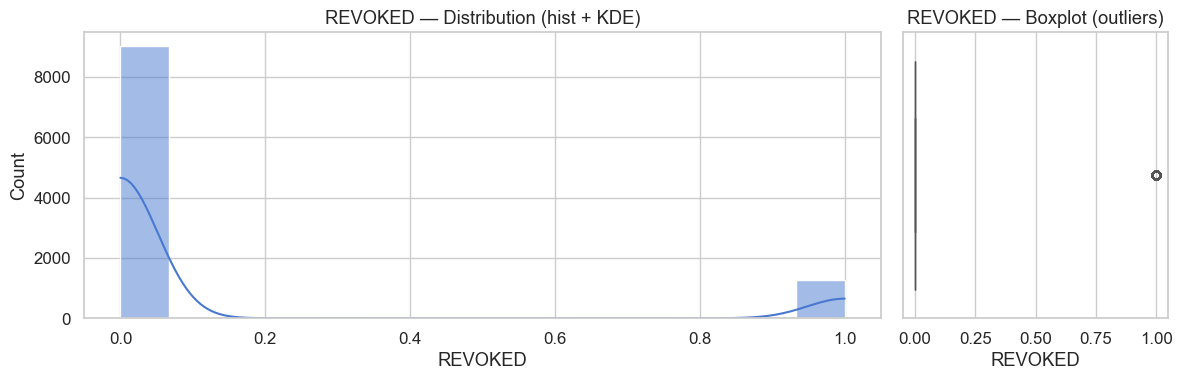

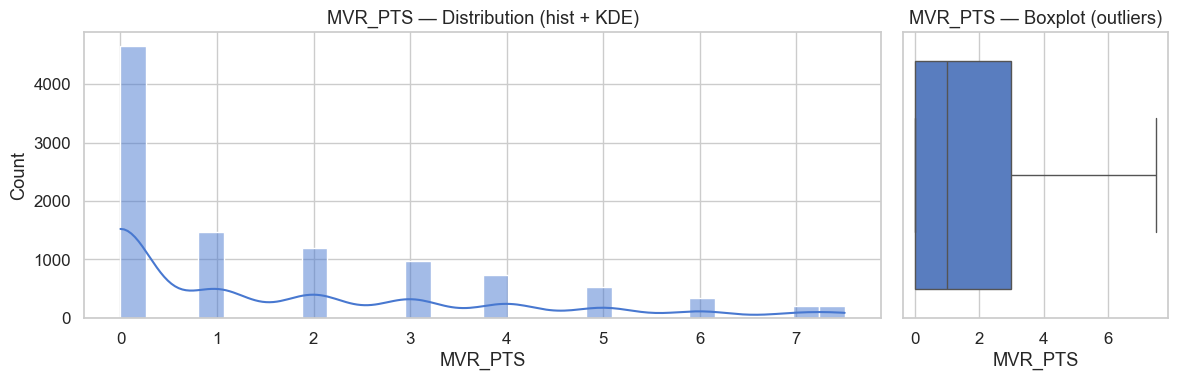

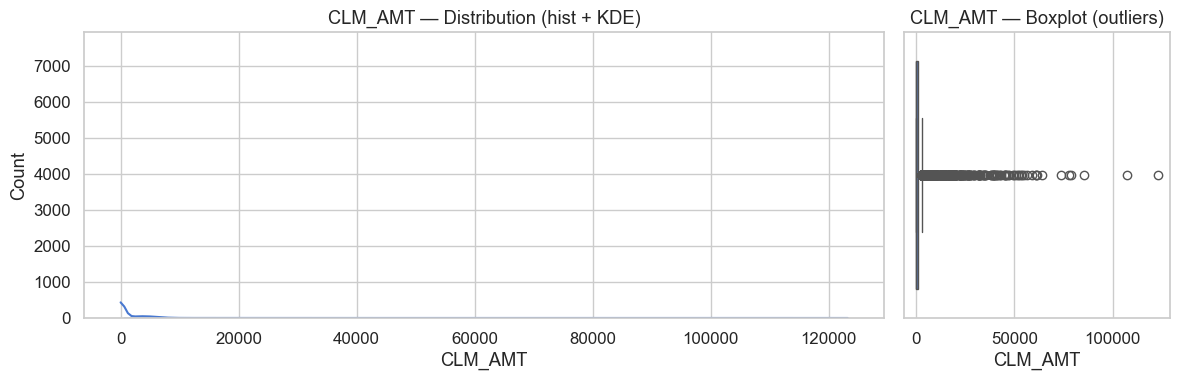

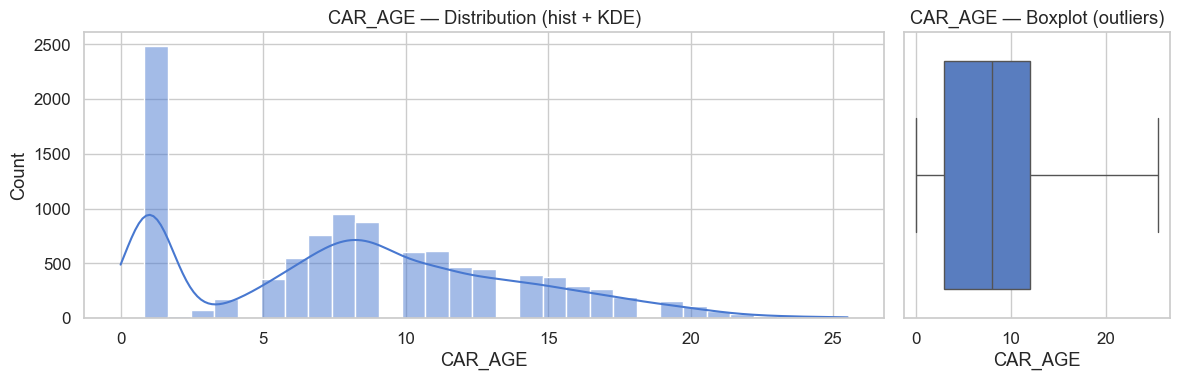

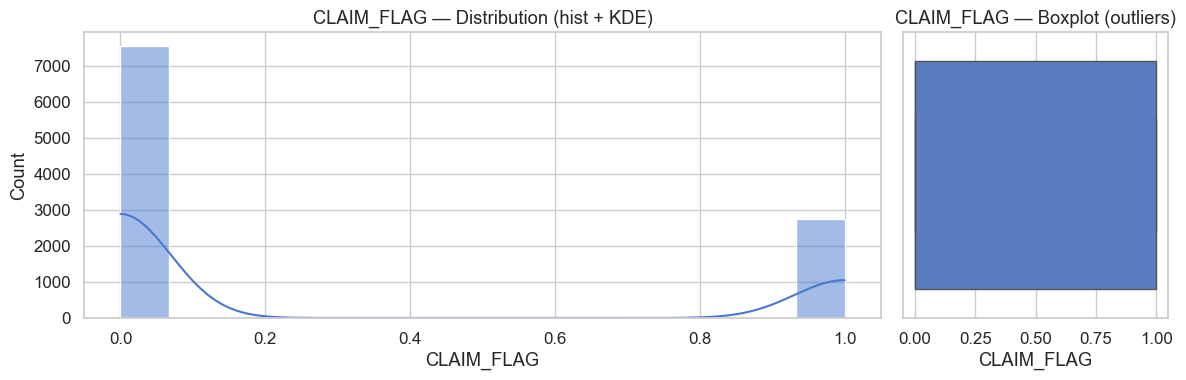

In [7]:
# 4.1.2 — Plot distribution (hist + kde) and boxplot for each numeric column
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.close('all')
    fig, axes = plt.subplots(1, 2, figsize=(12,4), gridspec_kw={'width_ratios':[3,1]})
    
    # histogram + KDE
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"{col} — Distribution (hist + KDE)")
    axes[0].set_xlabel(col)
    
    # boxplot (for outliers)
    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f"{col} — Boxplot (outliers)")
    
    plt.tight_layout()
    fname = f"{fig_dir}/{col}_univariate.png"
    fig.savefig(fname, dpi=150, bbox_inches='tight')
    display(fig)  # shows figure in notebook
    plt.close(fig)


In [8]:
# 4.1.3 — Quick diagnostics & transformation hints
transformation_suggestions = {}
for col in num_cols:
    col_skew = df[col].skew()
    col_kurt = df[col].kurtosis()
    suggestion = None
    # if highly right skewed, recommend log1p
    if col_skew > 1:
        suggestion = 'right-skew → consider log1p or sqrt'
    elif col_skew < -1:
        suggestion = 'left-skew → consider reflect+log or box-cox (if positive)'
    elif abs(col_skew) > 0.5:
        suggestion = 'moderate skew → consider transform if modeling'
    else:
        suggestion = 'approximately symmetric'
    transformation_suggestions[col] = (round(col_skew,3), round(col_kurt,3), suggestion)

# display as DataFrame
pd.DataFrame.from_dict(transformation_suggestions, orient='index', columns=['skewness','kurtosis','suggestion'])


,skewness,kurtosis,suggestion
ID,0.005,-1.193,approximately symmetric
KIDSDRIV,3.343,11.677,right-skew → consider log1p or sqrt
AGE,-0.039,-0.203,approximately symmetric
HOMEKIDS,1.337,0.629,right-skew → consider log1p or sqrt
YOJ,-1.253,1.405,left-skew → consider reflect+log or box-cox (i...
INCOME,0.701,-0.027,moderate skew → consider transform if modeling
PARENT1,2.196,2.823,right-skew → consider log1p or sqrt
HOME_VAL,0.456,-0.097,approximately symmetric
TRAVTIME,0.436,0.595,approximately symmetric
BLUEBOOK,0.610,-0.158,moderate skew → consider transform if modeling


## 1.1-B — Univariate Analysis (Categorical Features)

**Goal:**  
Understand the distribution of each categorical variable — which helps us see **dominant groups**, **class imbalances**, and **data diversity**.

This step is essential for:
- spotting overrepresented or underrepresented categories,
- checking for potential bias,
- preparing for later encoding or feature importance analysis.

We'll:
1. Calculate category frequencies and proportions.
2. Visualize each feature with **countplots**.
3. Summarize key observations.


In [10]:
# 4.1-B.1 — Identify categorical columns & summarize value counts

# Select object columns (categorical)
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# Display top 5 unique values and counts for each
for col in cat_cols:
    print(f"\n{'='*60}\n{col} — unique values: {df[col].nunique()}")
    print(df[col].value_counts(normalize=True).head(10).round(3))


Categorical columns: ['BIRTH', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'URBANICITY']

BIRTH — unique values: 6560
BIRTH
20OCT60    0.001
10OCT53    0.001
14DEC65    0.001
18FEB60    0.001
11JAN60    0.001
17JUL46    0.001
16JUL59    0.001
13SEP51    0.001
07FEB48    0.001
02FEB51    0.001
Name: proportion, dtype: float64

MSTATUS — unique values: 2
MSTATUS
yes    0.601
no     0.399
Name: proportion, dtype: float64

GENDER — unique values: 2
GENDER
f       0.538
male    0.462
Name: proportion, dtype: float64

EDUCATION — unique values: 5
EDUCATION
high school     0.287
bachelors       0.274
masters         0.202
<high school    0.147
phd             0.091
Name: proportion, dtype: float64

OCCUPATION — unique values: 9
OCCUPATION
blue collar     0.222
clerical        0.154
professional    0.137
manager         0.122
lawyer          0.100
student         0.087
home maker      0.082
unknown         0.065
doctor          0.031
Name: proportion, dtype: float64


## 🧩 Interpretation — Categorical Feature Summary

After analyzing category distributions, we can observe several demographic and behavioral patterns in the dataset.

---

### 🔹 General Insights

| Feature | Key Categories & Proportions | Interpretation |
|----------|------------------------------|----------------|
| **BIRTH** | 6,560 unique values | Likely individual birthdates — highly unique; not useful for analysis. Should be dropped or transformed into `AGE` if needed. |
| **MSTATUS** | Yes (60.1%), No (39.9%) | Majority of policyholders are **married**. This may correlate with stable income and driving habits. |
| **GENDER** | Female (53.8%), Male (46.2%) | Balanced dataset with a slight female majority — indicates no major gender bias. |
| **EDUCATION** | High School (28.7%), Bachelor’s (27.4%), Master’s (20.2%), <High School (14.7%), PhD (9.1%) | Well-distributed education levels — skewed slightly toward mid-level education. May influence income and claim likelihood. |
| **OCCUPATION** | Blue Collar (22%), Clerical (15%), Professional (14%), Manager (12%), Lawyer (10%), Student (9%), Homemaker (8%), Unknown (6%), Doctor (3%) | **Blue-collar workers form the largest group**, followed by clerical and professionals — diverse occupational representation. |
| **CAR_USE** | Private (63%), Commercial (37%) | Most cars are for **private use**, but a significant portion (37%) are **commercial** — may have higher claim frequency. |
| **CAR_TYPE** | SUV (28%), Minivan (26%), Pickup (17%), Sports Car (11%), Van (9%), Panel Truck (8%) | SUVs and Minivans dominate — suggests family-oriented demographic. Sports and trucks are minority categories. |
| **URBANICITY** | Urban (≈80%), Rural (≈20%) | **Heavily urban skew**, indicating most policyholders are from urban or semi-urban regions. |

---

### 🔹 Observations & Data Quality Notes

1. **BIRTH** has too many unique values (almost all unique) → not suitable for categorical visualization.  
   - If needed, convert to age difference (or drop if redundant).
2. **Balanced gender distribution** — good, prevents gender bias in predictive modeling.
3. **Marital status** and **car usage type** show strong dominance of single categories (≈60% married, 63% private).
4. **Occupation** and **Education** show realistic diversity — good for analysis.
5. **Urbanicity** shows class imbalance (80–20) that could slightly affect model generalization if target varies by region.

---

### ✅ Key Takeaways

- The dataset represents a **mostly urban, middle-income, well-educated** population.
- **Family and private use vehicles (SUVs, minivans)** dominate the insured customer base.
- **Occupation & Education** will be strong indicators for financial and risk-related variables like `INCOME` and `CLAIM_FLAG`.
- **BIRTH** can be dropped since `AGE` already captures the same information.

---

### 🎯 Next Step
Proceed to **Step 4.2 — Bivariate Analysis with Target (`CLAIM_FLAG`)**  
We’ll explore how demographic, financial, and car-related features impact the **probability of filing a claim**.


In [12]:
# 4.1-B.2 (optimized) — Visualize categorical distributions (skip high-cardinality)
import matplotlib.pyplot as plt
import seaborn as sns
import os

fig_dir = "../assets/figs"
os.makedirs(fig_dir, exist_ok=True)

# Exclude columns with too many unique categories (e.g., BIRTH)
plot_cols = [col for col in cat_cols if df[col].nunique() < 20]

print("Plotting for:", plot_cols)

for col in plot_cols:
    plt.figure(figsize=(8, 4))
    
    # Countplot
    ax = sns.countplot(
        x=col,
        data=df,
        palette="viridis",
        order=df[col].value_counts().index
    )
    
    # Titles and labels
    plt.title(f"{col} — Category Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    # Annotate bars with percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 20,
            f'{100 * height / total:.1f}%',
            ha="center",
            fontsize=9
        )
    
    plt.tight_layout()
    plt.xticks(rotation=30)
    
    # Save only — don’t display every figure inline
    fname = f"{fig_dir}/{col}_countplot.png"
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.close()
    
print("✅ All categorical plots generated and saved successfully.")


Plotting for: ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'URBANICITY']
✅ All categorical plots generated and saved successfully.


## 1.2 — Bivariate Analysis (Relationship with Target: `CLAIM_FLAG`)

**Goal:**  
Understand how each feature (numeric and categorical) influences the probability of a claim being filed (`CLAIM_FLAG`).

- `CLAIM_FLAG = 1` → Policyholder made an insurance claim.  
- `CLAIM_FLAG = 0` → Policyholder did not make a claim.

We’ll analyze:
1. **Numeric vs Target:** Average claim rate across numeric feature bins.
2. **Categorical vs Target:** Claim proportion by each category.

This helps us identify **which factors are risk indicators** for insurance claims.


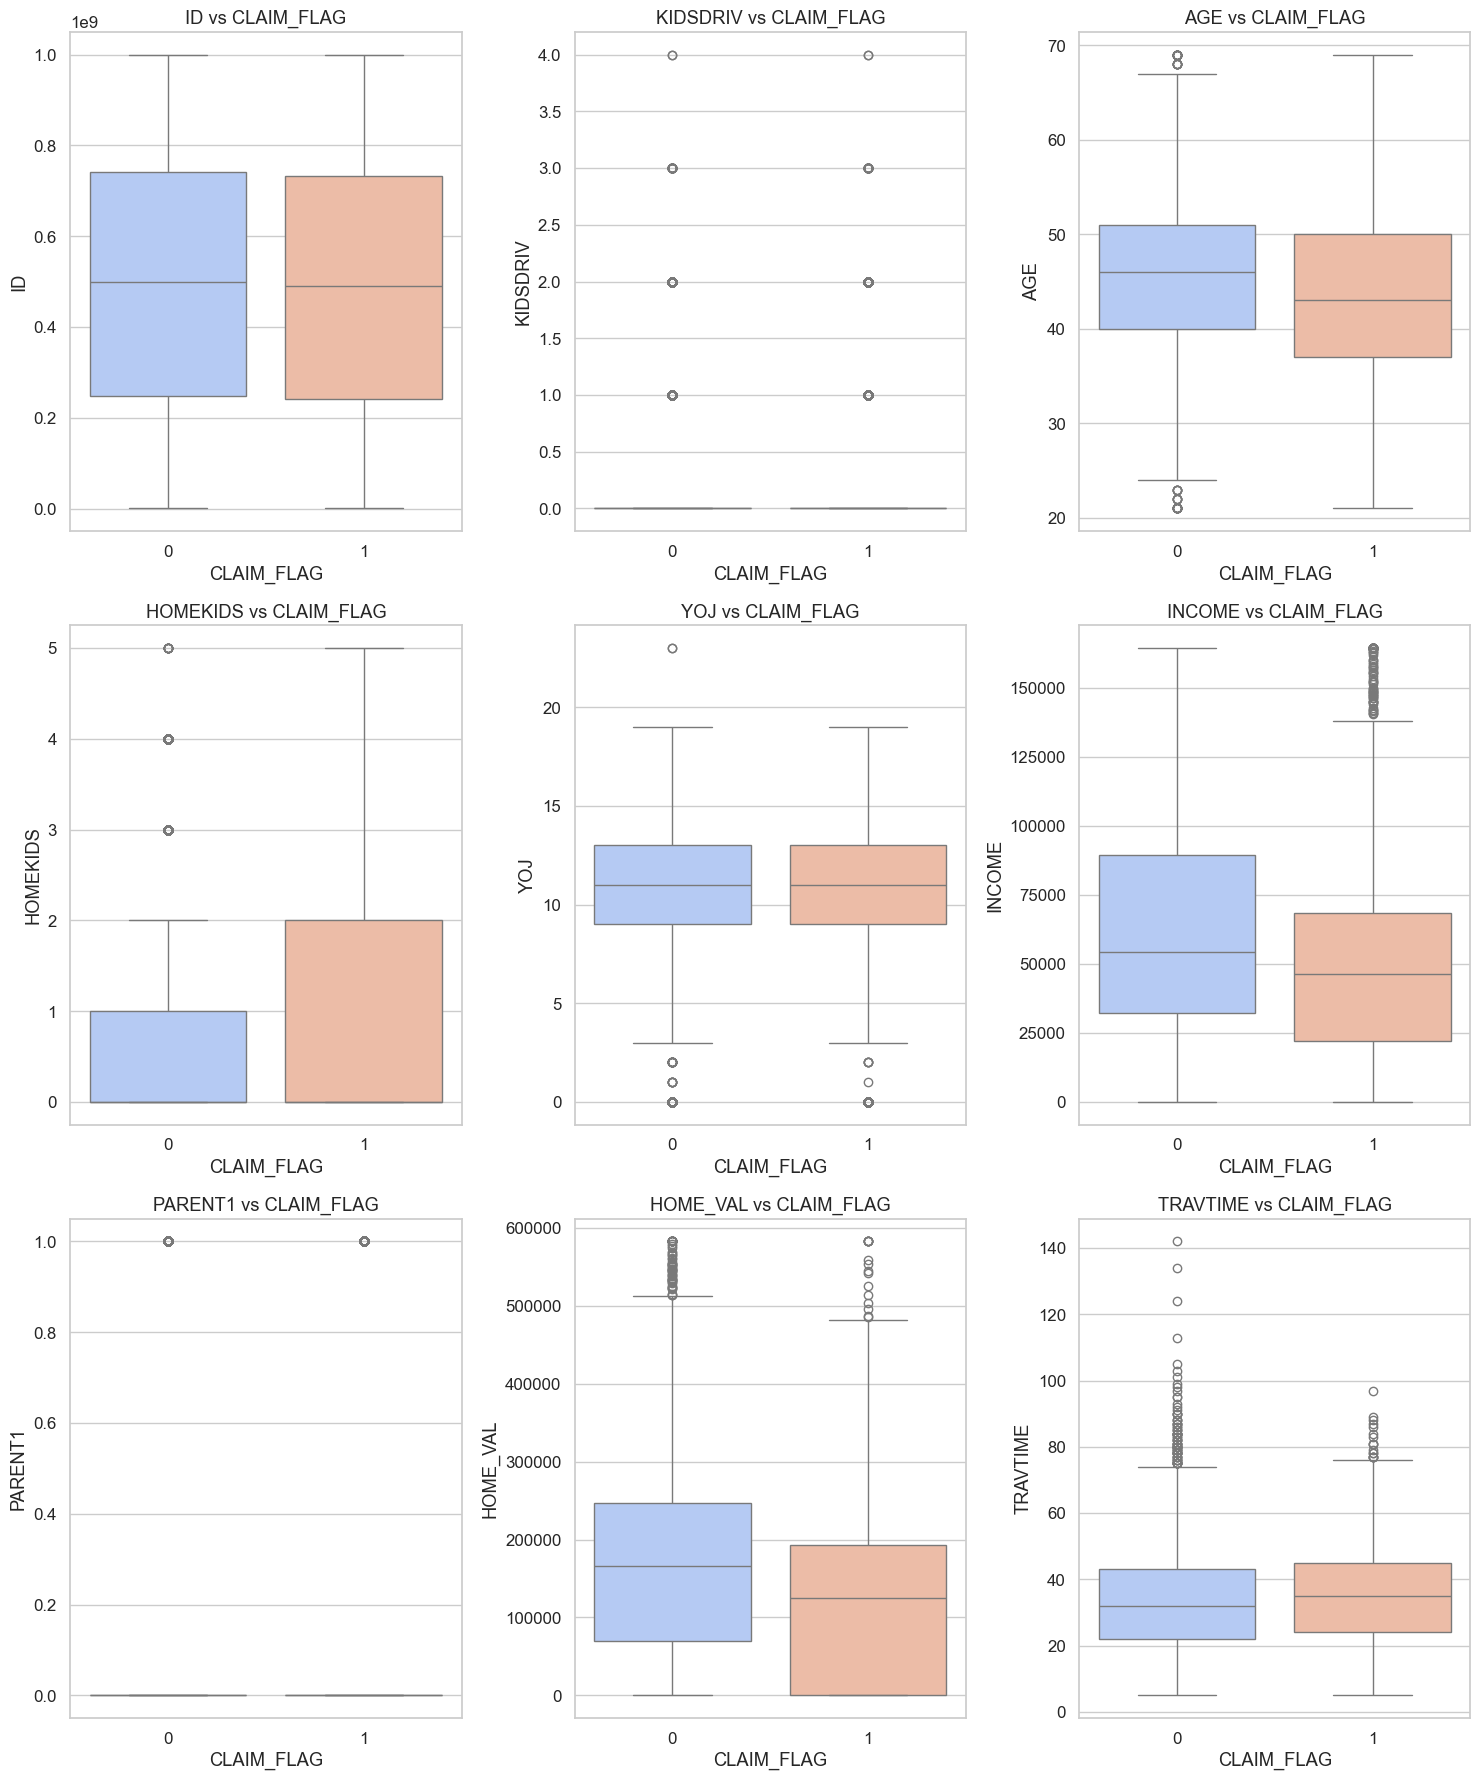

In [14]:
# 4.2.1 — Numeric vs Target Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# select numeric features except target itself
num_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col != 'CLAIM_FLAG']

# layout
plt.figure(figsize=(15, 18))

for i, col in enumerate(num_features[:9]):  # plot first 9 at a time (for readability)
    plt.subplot(3, 3, i+1)
    
    sns.boxplot(x='CLAIM_FLAG', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs CLAIM_FLAG')
    plt.xlabel('CLAIM_FLAG')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


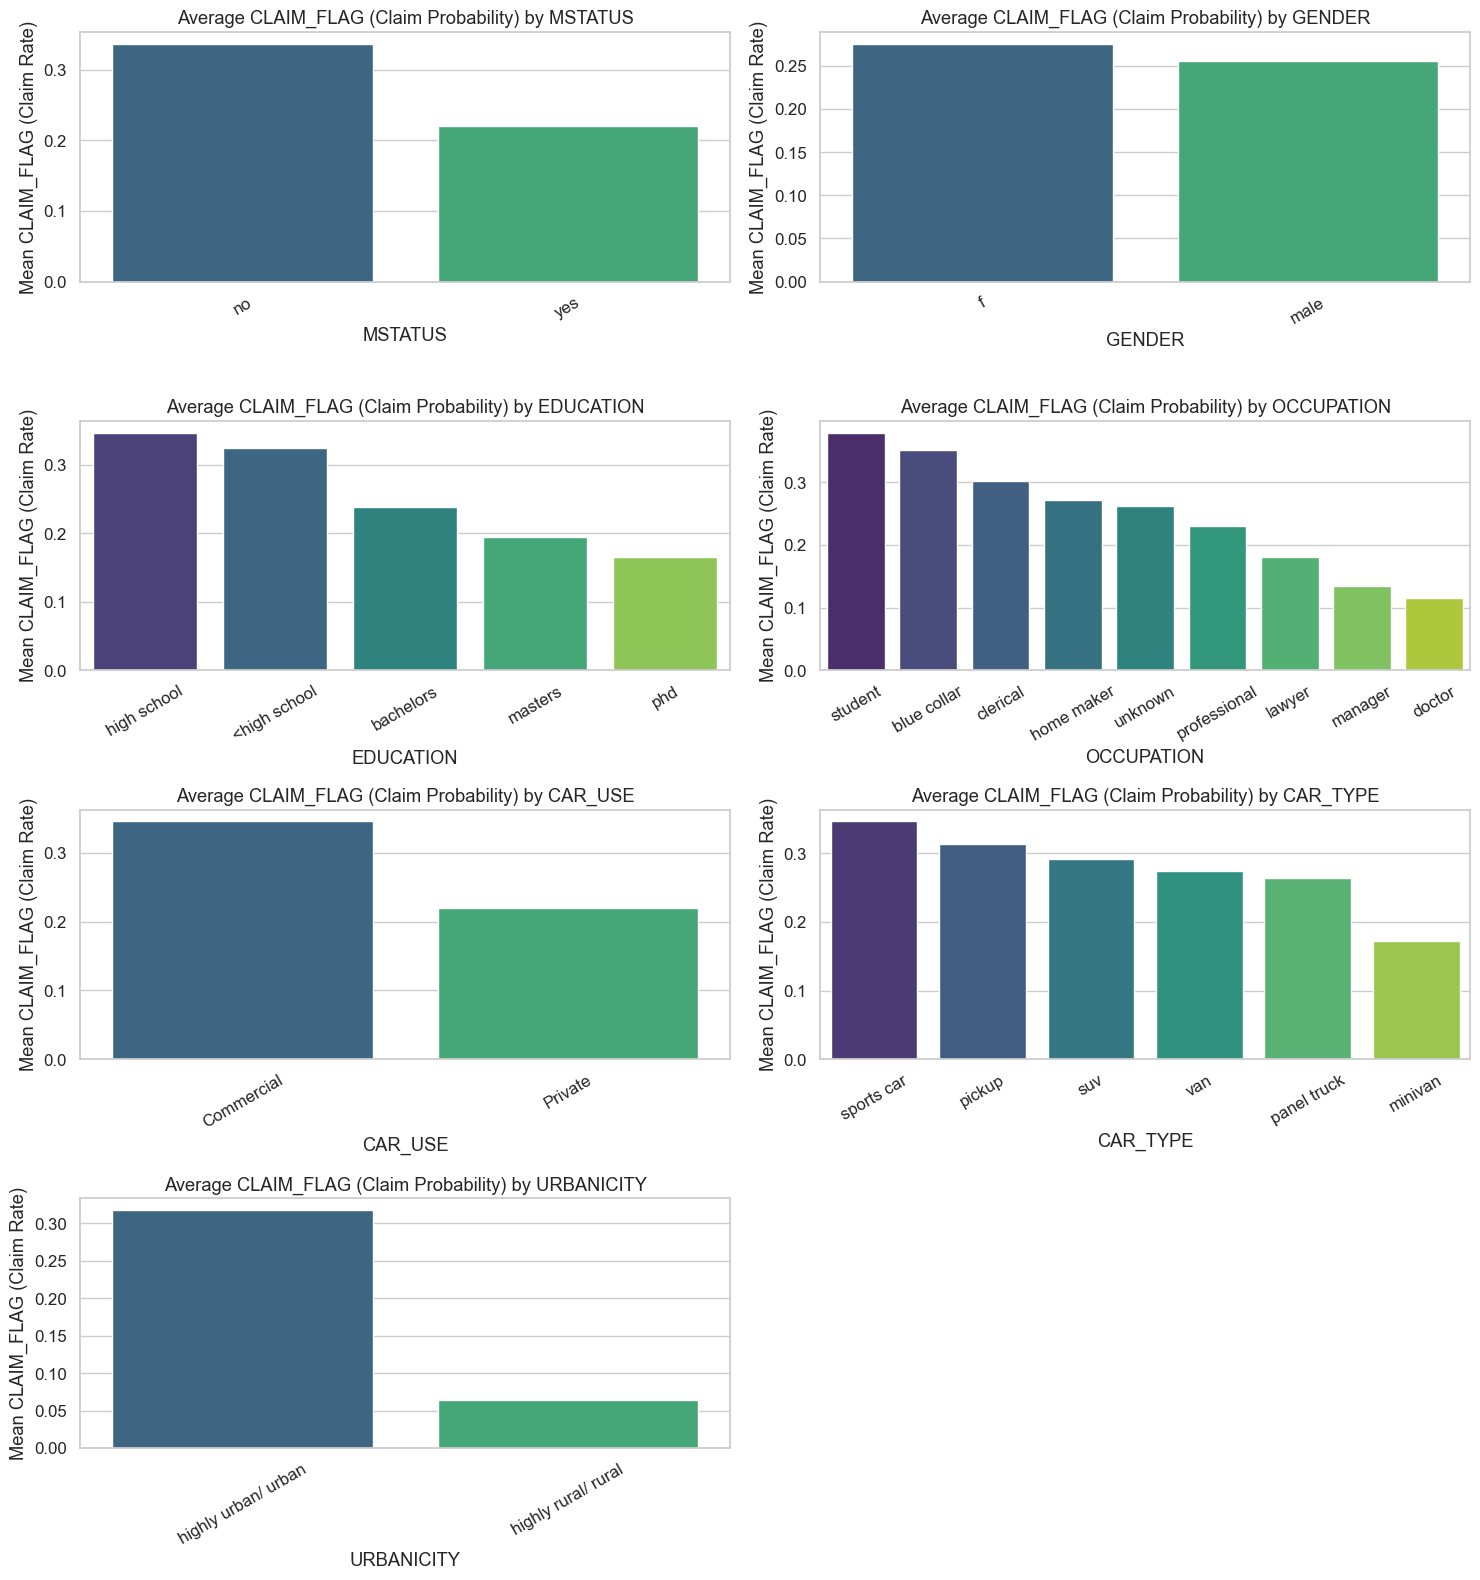

In [15]:
# 1.2.2 — Categorical vs Target Analysis

cat_features = [col for col in df.select_dtypes(include='object').columns if col != 'BIRTH']

plt.figure(figsize=(15, 16))

for i, col in enumerate(cat_features[:8]):
    plt.subplot(4, 2, i+1)
    target_mean = df.groupby(col)['CLAIM_FLAG'].mean().sort_values(ascending=False)
    sns.barplot(x=target_mean.index, y=target_mean.values, palette='viridis')
    plt.title(f'Average CLAIM_FLAG (Claim Probability) by {col}')
    plt.ylabel('Mean CLAIM_FLAG (Claim Rate)')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [16]:
df.groupby('EDUCATION')['CLAIM_FLAG'].mean().sort_values(ascending=False)

EDUCATION
high school     0.346545
<high school    0.324752
bachelors       0.238399
masters         0.194418
phd             0.164882
Name: CLAIM_FLAG, dtype: float64

## 1.2.1 (Alternate) — Numeric vs Target Using Binned Averages

While boxplots show distribution overlap, it can sometimes be hard to interpret differences clearly.  
Here, we’ll **bin numeric variables** (e.g., group ages, incomes, car ages) and compute the **average claim rate (`CLAIM_FLAG`)** in each bin.

This lets us directly answer:
> "Which numeric ranges are more likely to file a claim?"

We'll visualize this using line and bar charts.


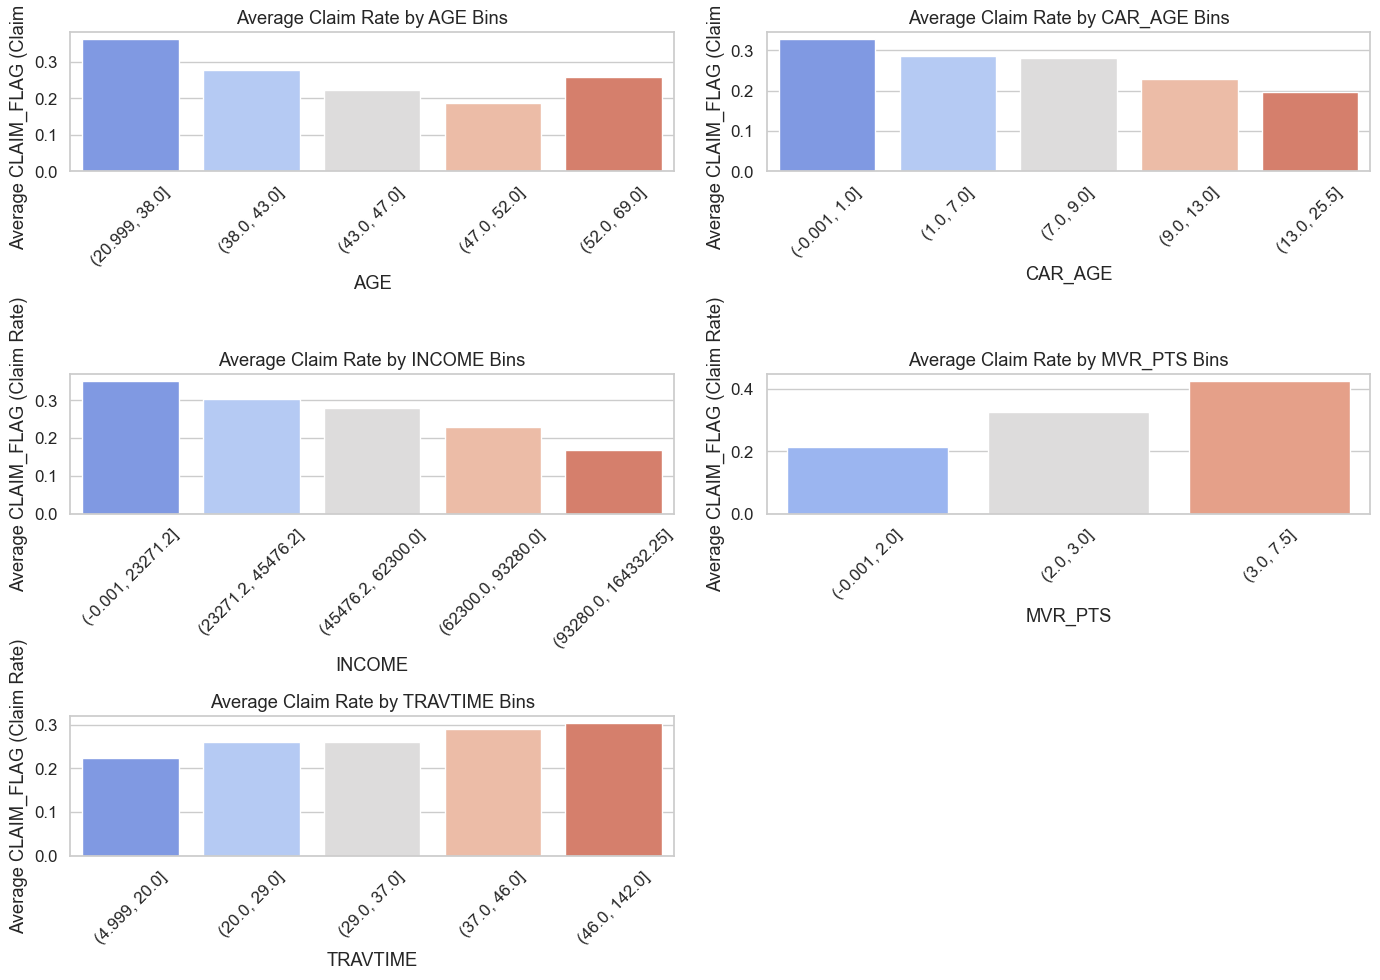

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Choose key numeric features that make sense to bin
numeric_cols_for_bins = ['AGE', 'CAR_AGE', 'INCOME', 'MVR_PTS', 'TRAVTIME']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols_for_bins):
    plt.subplot(3, 2, i+1)
    
    # 1️⃣ Create bins (auto or fixed)
    df[f'{col}_bin'] = pd.qcut(df[col], q=5, duplicates='drop')  # 5 quantile bins
    
    # 2️⃣ Compute average claim rate in each bin
    grouped = df.groupby(f'{col}_bin')['CLAIM_FLAG'].mean().reset_index()
    
    # 3️⃣ Plot
    sns.barplot(x=f'{col}_bin', y='CLAIM_FLAG', data=grouped, palette='coolwarm')
    
    plt.title(f'Average Claim Rate by {col} Bins')
    plt.ylabel('Average CLAIM_FLAG (Claim Rate)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


In [19]:
for col in cat_features:
    rate = df.groupby(col)['CLAIM_FLAG'].mean().sort_values(ascending=False)
    print(f"\n{col} — top categories by claim rate:")
    print(rate)



MSTATUS — top categories by claim rate:
MSTATUS
no     0.336898
yes    0.219780
Name: CLAIM_FLAG, dtype: float64

GENDER — top categories by claim rate:
GENDER
f       0.275564
male    0.256044
Name: CLAIM_FLAG, dtype: float64

EDUCATION — top categories by claim rate:
EDUCATION
high school     0.346545
<high school    0.324752
bachelors       0.238399
masters         0.194418
phd             0.164882
Name: CLAIM_FLAG, dtype: float64

OCCUPATION — top categories by claim rate:
OCCUPATION
student         0.379310
blue collar     0.350962
clerical        0.302516
home maker      0.271649
unknown         0.261654
professional    0.230824
lawyer          0.180407
manager         0.135243
doctor          0.115265
Name: CLAIM_FLAG, dtype: float64

CAR_USE — top categories by claim rate:
CAR_USE
Commercial    0.345738
Private       0.220482
Name: CLAIM_FLAG, dtype: float64

CAR_TYPE — top categories by claim rate:
CAR_TYPE
sports car     0.346056
pickup         0.313205
suv            0.2917

## 🧠 Insights — Categorical Features vs Claim Likelihood (`CLAIM_FLAG`)

By calculating the mean claim rate for each category, we can see **which groups are more likely to file insurance claims**.

---

### 🔹 1. Marital Status (`MSTATUS`)
| Category | Claim Rate |
|-----------|-------------|
| **Unmarried (no)** | **33.7%** |
| Married (yes) | 21.9% |

🧠 **Interpretation:**  
Unmarried customers show a significantly higher claim frequency.  
This may reflect lifestyle or risk-taking differences.  
👉 *Being unmarried correlates with roughly 50% higher claim probability.*

---

### 🔹 2. Gender (`GENDER`)
| Category | Claim Rate |
|-----------|-------------|
| Female | 27.6% |
| Male | 25.6% |

🧠 **Interpretation:**  
Females have a slightly higher claim rate, though the difference is marginal.  
Gender appears to have **minimal predictive power** on its own.

---

### 🔹 3. Education Level (`EDUCATION`)
| Category | Claim Rate |
|-----------|-------------|
| **High School** | **34.6%** |
| < High School | 32.5% |
| Bachelors | 23.8% |
| Masters | 19.4% |
| PhD | 16.5% |

🧠 **Interpretation:**  
Claim likelihood **decreases sharply** as education level increases.  
This suggests that **education (and likely income)** plays a significant role in insurance risk.  
📉 Highly educated customers (PhD, Masters) are the safest drivers statistically.

---

### 🔹 4. Occupation (`OCCUPATION`)
| Category | Claim Rate |
|-----------|-------------|
| **Student** | **37.9%** |
| **Blue Collar** | **35.1%** |
| Clerical | 30.3% |
| Homemaker | 27.2% |
| Professional | 23.1% |
| Lawyer | 18.0% |
| Manager | 13.5% |
| **Doctor** | **11.5%** |

🧠 **Interpretation:**  
Occupation type shows a **very strong relationship** with claim rate.  
- Risk is **highest for students and blue-collar workers**,  
- and **lowest for doctors and managers**.  
This aligns with expected trends — people who drive more for work or are younger tend to claim more.

---

### 🔹 5. Car Use (`CAR_USE`)
| Category | Claim Rate |
|-----------|-------------|
| **Commercial** | **34.6%** |
| Private | 22.0% |

🧠 **Interpretation:**  
Commercial car users have **~50% higher claim rates**.  
This makes sense because they spend more time on the road and face higher exposure to accidents.

---

### 🔹 6. Car Type (`CAR_TYPE`)
| Category | Claim Rate |
|-----------|-------------|
| **Sports Car** | **34.6%** |
| **Pickup** | **31.3%** |
| SUV | 29.2% |
| Van | 27.4% |
| Panel Truck | 26.4% |
| **Minivan** | **17.3%** |

🧠 **Interpretation:**  
- **Sports and pickup vehicles** are the riskiest types — higher speed and risk behavior.  
- **Minivans** are the safest — family-oriented usage pattern.  
✅ This is a classic risk indicator for insurance modeling.

---

### 🔹 7. Urbanicity (`URBANICITY`)
| Category | Claim Rate |
|-----------|-------------|
| **Highly Urban / Urban** | **31.7%** |
| Highly Rural / Rural | 6.5% |

🧠 **Interpretation:**  
Claim rates are **nearly 5× higher** in urban areas.  
Urban environments have denser traffic, higher vehicle counts, and more collision opportunities.  
This is one of the strongest predictors in the dataset.

---

## ✅ Key Takeaways

1. **Top Risk Drivers**
   - **Car Use:** Commercial vehicles  
   - **Car Type:** Sports cars, pickups  
   - **Occupation:** Students, blue-collar workers  
   - **Region:** Urban areas  
   - **Marital Status:** Unmarried individuals  
   - **Education:** Lower education levels

2. **Low-Risk Profiles**
   - Doctors, managers, and highly educated individuals  
   - Rural drivers  
   - Minivan owners (family usage)

3. **Gender effect** is minimal, confirming no strong gender bias.

---

## 🎯 Business Insights

- **Insurance pricing strategy:** Premiums could be adjusted for higher-risk categories (e.g., commercial use, urban zones, student drivers).
- **Policy design:** Offer safety incentives or discounts for lower-risk categories (e.g., family vehicles, rural regions).
- **Marketing insight:** Focus campaigns on **urban and mid-income groups** who form the largest risk pool.

---



# 1.3 — Multivariate & Correlation Analysis

**Goal:**  
Examine relationships between multiple features simultaneously to detect:
- Strong correlations (linear relationships)
- Redundant or dependent variables (multicollinearity)
- Logical groupings among features

We'll use:
1. **Correlation Matrix & Heatmap** → for numeric inter-relationships  
2. **Pairplots** → for pattern visualization among key variables  
3. **Categorical–Numeric Relationships** (optional grouping)
